# Model 8 Unsupervised Learning

For this week's assignment I continued with the impatient charges dataset that I used in the previous weeks. For this assignment I applied unsupervised learning techniques to identify outliers in the healthcare dataset. 
Report outline:
 - Upload of dataset and quickview of it to ensure everything is okay
 - Splitting into train/test samples 
 - Application of unsupervised learning algorithms:
     - KNN 
     - Model Stablization for KNN with (1) average, (2) maximum of maximum, (3) average of maximum, (4) maximum of average
     - IForest: with sample values of 100/80/60  
     - Model Stablization for KNN with (1) average, (2) maximum of maximum, (3) average of maximum, (4) maximum of average
     - AutoEncoder

In [2]:
pip install autoencoder

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
import matplotlib.pyplot as plt
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pyod.models.auto_encoder import AutoEncoder
import os

Using TensorFlow backend.


In [4]:
os.chdir('C:/Users/rdiml/Documents/')

In [5]:
df = pd.read_csv('impatientfeatures.csv')
df.head()

,Unnamed: 0,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Total.Discharges,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,mean.count.trans,diff.to.mean,Provider.Zip.Code,Provider.Id
0,1,1.000000,1.000000,1.000000,1.000000,23,101884.0,115827.0,133707.0,23.000000,101884.000000,133707.000000,115827.000000,1,1.000000,99508,20017
1,2,2.381115,1.177820,1.011322,1.041118,91,97796.0,86548.0,93930.0,38.217391,83031.391304,92878.434783,83129.869565,23,1.011322,36301,10001
2,3,0.366325,0.361237,1.013594,1.092736,14,29994.0,90839.0,94141.0,38.217391,83031.391304,92878.434783,83129.869565,23,1.013594,35957,10005
3,4,0.627986,1.293451,0.939766,0.965646,24,107397.0,80274.0,87284.0,38.217391,83031.391304,92878.434783,83129.869565,23,0.939766,35631,10006
4,5,0.654152,0.282544,0.936148,0.887214,25,23460.0,73754.0,86948.0,38.217391,83031.391304,92878.434783,83129.869565,23,0.936148,35235,10011


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 17 columns):
Unnamed: 0                     163065 non-null int64
ratio.total.discharges         163065 non-null float64
ratio.avg.covered.charges      163065 non-null float64
ratio.avg.total.payments       163065 non-null float64
ratio.avg.medicare.payments    163065 non-null float64
Total.Discharges               163065 non-null int64
Average.Covered.Charges        163065 non-null float64
Average.Medicare.Payments      163065 non-null float64
Average.Total.Payments         163065 non-null float64
mean.total.discharges          163065 non-null float64
mean.avg.covered.charges       163065 non-null float64
mean.avg.total.payments        163065 non-null float64
mean.avg.medicare.payments     163065 non-null float64
mean.count.trans               163065 non-null int64
diff.to.mean                   163065 non-null float64
Provider.Zip.Code              163065 non-null int64
Provider.Id      

Since we are still using the dataset that we have been using for the previous assignments I exported the dataset I created for those assignments, wrote it to another file and used this data as the input above. This data has also been normalized so I do not need to worry about this step here either

In [6]:
x = df.iloc[:, [1,2,3,4,6,7,8,9,10,11,12]]
y = df.iloc[:,16]

In [7]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [8]:
X_train.head()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments
26935,0.644672,3.631942,0.809682,0.707036,151626.0,41329.0,56401.0,37.228261,41747.913043,69658.184783,58453.891304
3332,1.833333,0.997758,1.861426,2.147360,114188.0,30329.0,38239.0,30.000000,114444.571429,20542.857143,14123.857143
44167,0.882998,1.214281,1.066605,1.187675,95785.0,44746.0,44620.0,23.782609,78882.043478,41833.652174,37675.304348
45554,0.773109,1.020478,1.127861,0.274411,116562.0,6648.0,18861.0,23.282609,114222.978261,16722.804348,24226.434783
70056,0.696203,0.705820,1.009352,1.102307,33291.0,64339.0,71120.0,15.800000,47166.400000,70461.066667,58367.600000


In [9]:
X_test.head()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments
136351,3.910825,0.835043,1.279218,1.080473,92236.0,117579.0,126139.0,41.934884,110456.613953,98606.367442,108821.795349
89009,0.433498,1.058404,1.170781,1.316746,110313.0,36272.0,42089.0,32.295455,104225.795455,35949.500000,27546.704545
123343,1.503632,0.467309,0.803349,0.818894,22341.0,42515.0,53062.0,17.956522,47807.739130,66051.000000,51917.608696
24542,0.819981,0.162313,0.981844,0.988096,9399.0,86377.0,93005.0,36.586207,57906.724138,94724.827586,87417.620690
65814,0.221424,3.251144,1.026449,0.999571,152200.0,96774.0,100149.0,85.808219,46814.287671,97568.383562,96815.493151


# KNN 

In [23]:
clf_name = 'KNN'
clf = KNN(n_neighbors=3, method='largest')
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3, p=2,
  radius=1.0)

In [24]:
y_train_scores = clf.decision_scores_
y_train_scores[1:10]

array([7394.58012732, 7487.20355275, 6359.08386889, 4856.38701824,
       5431.99439189, 5201.06189679, 5590.87154577, 8973.20610242,
       4261.83804444])

In [25]:
y_test_pred = clf.predict(X_test)  
y_test_pred = pd.Series(y_test_pred)
y_test_pred.value_counts()

0    44137
1     4783
dtype: int64

In [26]:
y_test_scores = clf.decision_function(X_test)
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0    6395.137224
1    4153.800002
2    4613.787828
3    5504.692424
4    7644.955617
dtype: float64

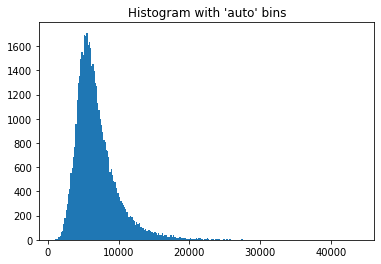

In [27]:
plt.hist(y_test_scores, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

In [95]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<30000, 0, 1)
X_test_cluster['cluster'].value_counts()

1    34386
0    14534
Name: cluster, dtype: int64

I tried to pick a value that would allow me to minimize the number of instances in the one cluster but it did not have any substantial affect so I stuck with a value of >= to 30000 for potential outliers

In [29]:
X_test_cluster.groupby('cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,distance
cluster,,,,,,,,,,,,
0,0.994100,1.003973,1.000420,0.995109,81560.210883,75758.855701,76887.492498,39.467555,81198.615023,76798.412516,76087.772234,6743.838455
1,0.999801,1.002074,1.000018,1.003971,79409.364309,75896.582001,74237.131091,44.101265,79340.476724,74238.321898,75706.664248,23365.190960


## Maximum of maximum

As we know, the idea with the maximum of maximum is to merge the outlier scores from the predictors. Now the idea of the below is that since I know of the sensitive nature of the KNN model to the n - number of neighbors I am creating a zero matrix below to store the output of the models I am going to run with KNN to see the what can be achieved in different applictions of the model before ultimately evaluating it 

In [30]:
n_clf = 10
k_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [31]:
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

In [32]:
train_scores.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
for i in range(n_clf):
        k = k_list[i]

        clf = KNN(n_neighbors=k, method='largest')
        clf.fit(X_train)

        train_scores.loc[:, i] = clf.decision_scores_
        test_scores.loc[:, i] = clf.decision_function(X_test) # Predict raw anomaly score of X using the fitted detector.

In [34]:
train_scores[1:10]

,0,1,2,3,4,5,6,7,8,9
1,8422.931718,9429.604399,10212.411221,11090.858990,11771.257195,11997.292701,12386.918805,12530.590647,12716.701998,13063.643312
2,10259.686499,11845.824418,13173.714841,15090.501897,16333.146218,16654.535580,17103.819293,17416.441081,18088.175992,18261.973118
3,6612.608448,7374.439025,7730.689308,7968.415298,8260.747895,8539.267772,8654.509179,9013.401970,9163.215648,9403.882125
4,5239.889097,5771.702811,6010.869401,6293.517595,6928.756542,7303.721904,7697.128205,7983.169122,8210.961925,8431.895656
5,7286.757187,8445.606530,9033.469437,9560.482468,9756.827827,10195.755024,10569.034456,10881.880333,11086.993130,11380.272556
6,5381.276910,6194.278207,6712.228626,6980.529532,7415.231628,7644.588907,7924.295644,8126.044572,8295.160541,8488.569890
7,7618.710673,8833.866367,9279.482103,10195.600906,10359.009711,10770.442129,11108.149639,11533.748676,11847.283468,12011.112900
8,9247.917207,10140.865013,11448.943268,11856.274800,12390.930799,12827.148325,13499.628141,14126.922240,14655.756017,14873.095583
9,4749.877093,5641.056802,6559.776571,7272.998647,7820.096384,8052.577080,8531.122222,8735.303848,9078.168906,9313.303578


## Average (average score of all detectors)

Average here indicates that I am averaging the outlier scores from the estimators to use in stabilzation

In [35]:
y_by_average = average(test_scores)
y_by_average[1:10]

array([10406.03229677,  6638.92316822,  8569.23419522, 11193.8823102 ,
        9003.25695246, 15545.40591691, 20072.28722156, 19813.37266138,
       11197.76769998])

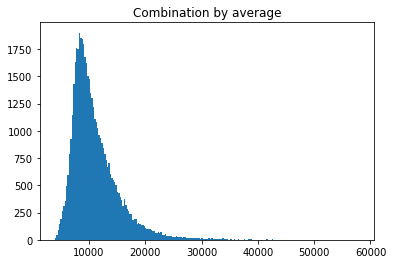

In [36]:
y_by_average = average(test_scores)
plt.hist(y_by_average, bins='auto')
plt.title("Combination by average")
plt.show()

In [37]:
df_test = X_test.copy()
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<35000, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    48841
1       79
Name: y_by_average_cluster, dtype: int64

In an effort to isolate the outliers I chose a cutoff value of 35000

In [38]:
df_test.groupby('y_by_average_cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,
0,0.998438,1.002458,0.999533,1.000415,80052.935259,75803.063328,75056.783031,42.739808,79899.331472,75026.738509,75794.999547,11030.811259
1,0.798849,1.111983,1.373743,1.579703,75296.012658,108499.240506,52712.531646,37.488329,74014.267357,55498.257166,90865.910630,40406.020860


Here I would classify instances in cluster 1 as potential outliers because the distance between points is much larger then in cluster 0 

## Maximum of maximum

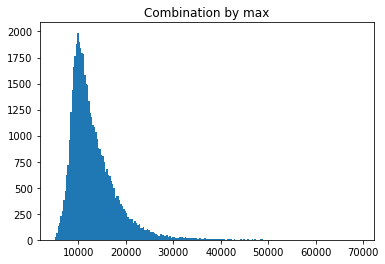

In [39]:
y_by_maximization = maximization(test_scores)
plt.hist(y_by_maximization, bins='auto')
plt.title("Combination by max")
plt.show()

In [40]:
df_test = X_test.copy()
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<40000, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    48821
1       99
Name: y_by_maximization_cluster, dtype: int64

Here I used a cutoff value of 40000 isolating the cases down to 99

In [41]:
df_test.groupby('y_by_maximization_cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,
0,0.998528,1.002286,0.999049,0.999691,80065.878577,75772.427623,75058.729420,42.732622,79906.959829,75044.128685,75800.367571,12999.385771
1,0.794554,1.174825,1.536521,1.820173,69874.121212,117001.686869,56266.676768,42.092606,71441.310572,50867.589146,85174.086907,46514.413499


Here I again chose cluster one because the distance between points is again greater then in cluster zero

## Average of maximum

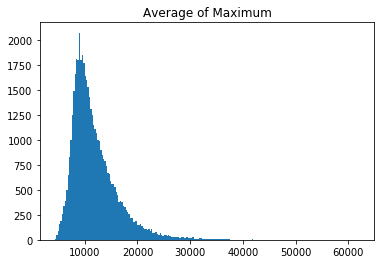

In [42]:
y_by_aom = aom(test_scores, n_buckets=5)
plt.hist(y_by_aom, bins='auto') 
plt.title("Average of Maximum")
plt.show()

In [46]:
df_test = X_test.copy()
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<35000, 0, 1)
df_test['y_by_aom_cluster'].value_counts()

0    48787
1      133
Name: y_by_aom_cluster, dtype: int64

Here I chose a cutoff value of 35000 because the number of cases is minimized again 

In [47]:
df_test.groupby('y_by_aom_cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,y_by_aom_score
y_by_aom_cluster,,,,,,,,,,,,
0,0.998633,1.002361,0.998830,0.999421,80066.574333,75761.060815,75068.254392,42.737834,79899.696328,75056.728999,75796.324315,11793.484738
1,0.808339,1.103160,1.479557,1.709309,72224.315789,110631.443609,57576.714286,40.344300,76269.855424,52426.016471,84260.943093,40413.001086


Cluster 1 is the one that has greater distance between points again, therefore leading me to pick this cluster

## Maximum of average 

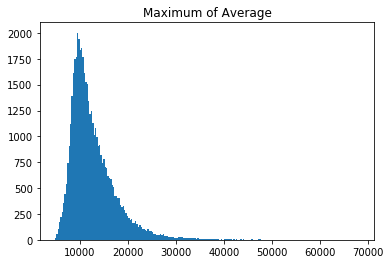

In [48]:
y_by_moa = moa(test_scores, n_buckets=5)
plt.hist(y_by_moa, bins='auto')
plt.title("Maximum of Average")
plt.show()

In [49]:
df_test = X_test.copy()
df_test['y_by_moa_score'] = y_by_moa
df_test['y_by_moa_cluster'] = np.where(df_test['y_by_moa_score']<40000, 0, 1)
df_test['y_by_moa_cluster'].value_counts()

0    48834
1       86
Name: y_by_moa_cluster, dtype: int64

In [50]:
df_test.groupby('y_by_moa_cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,y_by_moa_score
y_by_moa_cluster,,,,,,,,,,,,
0,0.998475,1.002238,0.999155,1.000080,80055.159479,75785.116579,75054.756153,42.736221,79904.453240,75037.941973,75797.941171,12691.740472
1,0.793879,1.228407,1.557858,1.722893,74420.209302,116028.755814,55682.186047,39.952610,71584.953617,50726.041097,87968.844670,46319.030519


# IForest

## Model 1

In [60]:
from pyod.models.iforest import IForest
clf1 = IForest(behaviour="new", max_samples=100) 
clf1.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

the number of samples is dependent upon the number of observations in the dataset, so here I chose to stck with 100 for the initial run

In [61]:
y_test_scores1 = clf.decision_function(X_test)
y_test_scores1 = pd.Series(y_test_scores1)
y_test_scores1.head()

0    11611.530104
1    12064.953524
2     7353.506845
3    10302.601804
4    13518.992255
dtype: float64

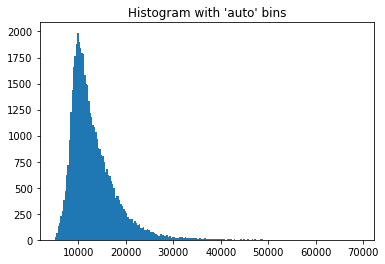

In [62]:
plt.hist(y_test_scores1, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

In [63]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores1
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<40000, 0, 1)
X_test_cluster['cluster'].value_counts()

1    34408
0    14512
Name: cluster, dtype: int64

In [64]:
X_test_cluster.groupby('cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,distance
cluster,,,,,,,,,,,,
0,0.993973,1.003940,1.00032,0.995715,81541.930127,75805.790243,76892.399945,39.467359,81181.647679,76815.295148,76093.108916,12931.139814
1,0.999862,1.002085,1.00006,1.003728,79414.011451,75876.982911,74231.286968,44.107946,79344.986760,74227.555646,75703.870704,46653.082133


## Model 2

In [100]:
clf2 = IForest(behaviour="new", max_samples=80) 
clf2.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=80, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [103]:
y_test_scores1 = clf2.decision_function(X_test)  # outlier scores
y_test_scores1 = pd.Series(y_test_scores1)
y_test_scores1.head()

0   -0.020502
1   -0.064601
2   -0.063677
3   -0.108538
4    0.000589
dtype: float64

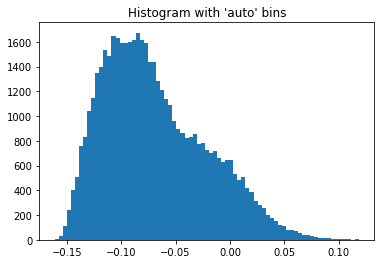

In [67]:
plt.hist(y_test_scores1, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [72]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores1
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.15, 0, 1)
X_test_cluster['cluster'].value_counts()

1    34382
0    14538
Name: cluster, dtype: int64

Here I chose a cutoff value of 0.15 which is not present on the histogram, and I could not minimize the number of samples in the cluster so I think there may be an underlying issue that I am not aware of here

In [73]:
X_test_cluster.groupby('cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,distance
cluster,,,,,,,,,,,,
0,0.993714,1.003873,1.000276,0.995420,81557.032260,75778.719769,76874.449443,39.459118,81205.870198,76796.677569,76082.213977,-0.068916
1,0.999977,1.002112,1.000078,1.003859,79406.016549,75888.483160,74236.864755,44.114940,79333.355669,74233.470983,75708.183148,NaN


## Model 3

In [74]:
clf3 = IForest(behaviour="new", max_samples=60) 
clf3.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=60, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [75]:
y_test_scores1 = clf3.decision_function(X_test)  # outlier scores
y_test_scores1 = pd.Series(y_test_scores1)
y_test_scores1.head()

0   -0.041751
1   -0.083491
2   -0.080880
3   -0.083112
4   -0.008770
dtype: float64

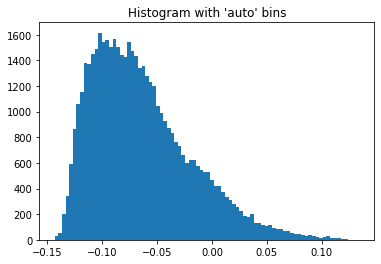

In [76]:
plt.hist(y_test_scores1, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [80]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.12, 0, 1)
X_test_cluster['cluster'].value_counts()

1    48920
Name: cluster, dtype: int64

In [81]:
X_test_cluster.groupby('cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,distance
cluster,,,,,,,,,,,,
1,0.998115,1.002635,1.000137,1.001351,80045.253393,75855.863778,75020.699714,42.731327,79889.827791,74995.202327,75819.337281,6829.58625


## Model 4

In [104]:
clf4 = IForest(behaviour="new", max_samples=400) 
clf4.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=400, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [105]:
y_test_scores1 = clf4.decision_function(X_test)  # outlier scores
y_test_scores1 = pd.Series(y_test_scores1)
y_test_scores1.head()

0   -0.020392
1   -0.086330
2   -0.079219
3   -0.101830
4    0.004942
dtype: float64

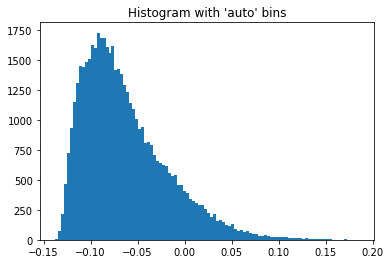

In [106]:
plt.hist(y_test_scores1, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [107]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.12, 0, 1)
X_test_cluster['cluster'].value_counts()

1    48920
Name: cluster, dtype: int64

Similar to what I saw when I sampled with 60 max samples I could not get a second cluster, so it leads me to believe that there is an issue somewhere.

# Model stability

In [108]:
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_,
                             'clf4': clf4.decision_scores_
                            })

# The predictions of the test data need to be predicted using clf.decision_function(X_test)
test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test),
                             'clf4': clf4.decision_function(X_test)
                            })

In [109]:
train_scores.head()

,clf1,clf2,clf3,clf4
0,0.007091,-0.004057,-0.048055,-0.007445
1,-0.007587,0.010066,0.024025,0.020877
2,-0.081594,-0.093569,-0.089872,-0.095353
3,-0.046027,-0.035710,-0.042993,-0.048686
4,-0.106025,-0.103566,-0.103939,-0.107911


In [110]:
test_scores.head()

,clf1,clf2,clf3,clf4
0,-0.043768,-0.020502,-0.041751,-0.020392
1,-0.082689,-0.064601,-0.083491,-0.086330
2,-0.079276,-0.063677,-0.080880,-0.079219
3,-0.099654,-0.108538,-0.083112,-0.101830
4,0.034074,0.000589,-0.008770,0.004942


In [111]:
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

## Average 

In [112]:
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([-0.37779776, -0.29872071, -0.81729504,  1.59889488, -0.76473055,
        1.46699861,  2.01156602,  1.04864485,  0.56195541])

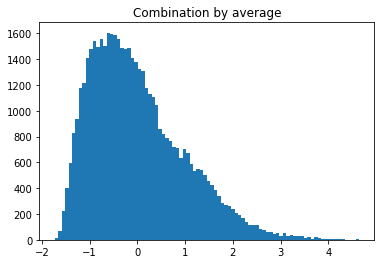

In [113]:
y_by_average = average(test_scores_norm)
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [114]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<3.4, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    48762
1      158
Name: y_by_average_cluster, dtype: int64

I chose the cutoff value of 3.4 because it looked like it dips in samples before going up again so I wanted to isolate those cases because they are most likely outliers

In [115]:
df_test.groupby('y_by_average_cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,
0,0.997670,1.002524,0.995088,0.993437,80016.607748,75664.153008,75046.254481,42.481507,79827.866106,75150.374334,75921.392045,-0.012592
1,1.135612,1.037107,2.558501,3.443758,88885.879747,135021.689873,67133.981013,119.830913,99012.458641,27105.978347,44323.170230,3.775056


I would say cluster 1 is most likely outliers because the score is much larger then in cluster 0

## Maximum of maximum 

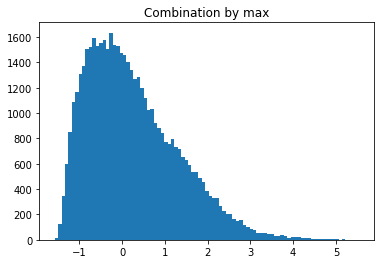

In [117]:
y_by_maximization = maximization(test_scores_norm)
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

In [118]:
df_test = pd.DataFrame(X_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<4, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    48788
1      132
Name: y_by_maximization_cluster, dtype: int64

In [119]:
df_test.groupby('y_by_maximization_cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,,
0,0.997608,1.002550,0.993670,0.995034,80031.683160,75702.211753,74976.135033,42.57270,79846.072176,75116.978096,75897.100478,-0.010592,0.000963,0.233852
1,1.185608,1.034091,3.390534,3.336141,85060.893939,132646.583333,91492.075758,101.36098,96062.168440,29986.140313,47077.588614,3.781955,0.840909,4.410499


I chose cluster 1 because again the score is larger for this one in comparison to cluster 0 

## AutoEncoder

### Model 1

In [10]:
ae_clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
ae_clf1.fit(X_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                132       
_________________________________________________________________
dropout_2 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                300       
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

Epoch 56/100
102730/102730 [==============================] - 10s 102us/step - loss: 0.9991 - val_loss: 1.0085
Epoch 57/100
102730/102730 [==============================] - 10s 101us/step - loss: 0.9991 - val_loss: 1.0085
Epoch 58/100
102730/102730 [==============================] - 10s 101us/step - loss: 0.9991 - val_loss: 1.0085
Epoch 59/100
102730/102730 [==============================] - 11s 103us/step - loss: 0.9991 - val_loss: 1.0085
Epoch 60/100
102730/102730 [==============================] - 10s 102us/step - loss: 0.9991 - val_loss: 1.0085
Epoch 61/100
102730/102730 [==============================] - 11s 103us/step - loss: 0.9991 - val_loss: 1.0085
Epoch 62/100
102730/102730 [==============================] - 10s 100us/step - loss: 0.9991 - val_loss: 1.0085
Epoch 63/100
102730/102730 [==============================] - 10s 102us/step - loss: 0.9991 - val_loss: 1.0085
Epoch 64/100
102730/102730 [==============================] - 10s 101us/step - loss: 0.9991 - val_loss: 1.0085
E

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000028CA2868AE8>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [11]:
y_train_scores = ae_clf1.decision_scores_ 

In [12]:
y_train_scores = ae_clf1.decision_scores_ 
y_test_pred = ae_clf1.predict(X_test)
y_test_scores = ae_clf1.decision_function(X_test)
y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

In [13]:
y_test_pred.value_counts()

0    43977
1     4943
dtype: int64

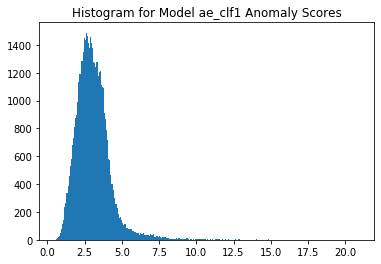

In [14]:
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model ae_clf1 Anomaly Scores")
plt.show()

In [16]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<14.5, 0, 1)
df_test['cluster'].value_counts()

1    34386
0    14534
Name: cluster, dtype: int64

I chose a cutoff value of 14.5 because I was trying to classify a small number of potential fraud cases to be examined later on

In [17]:
df_test.groupby('cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,score
cluster,,,,,,,,,,,,
0,0.993662,1.003928,1.000257,0.995378,81564.176345,75777.040801,76871.173043,39.459900,81211.173513,76794.916323,76083.372430,3.082569
1,0.999998,1.002089,1.000086,1.003876,79403.247165,75889.180044,74238.556418,44.114068,79331.331929,74234.513581,75707.737012,16.638611


### Model 2

In [18]:
ae_clf2 = AutoEncoder(hidden_neurons =[25, 10,2, 10, 25])
ae_clf2.fit(X_train)
y_test_scores = ae_clf2.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 11)                132       
_________________________________________________________________
dropout_7 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 11)                132       
_________________________________________________________________
dropout_8 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 25)                300       
_________________________________________________________________
dropout_9 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

102730/102730 [==============================] - 11s 111us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 54/100
102730/102730 [==============================] - 11s 112us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 55/100
102730/102730 [==============================] - 12s 112us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 56/100
102730/102730 [==============================] - 12s 112us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 57/100
102730/102730 [==============================] - 11s 111us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 58/100
102730/102730 [==============================] - 12s 113us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 59/100
102730/102730 [==============================] - 12s 120us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 60/100
102730/102730 [==============================] - 12s 112us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 61/100
102730/102730 [==============================] - 12s 112us/step - loss: 0.9980 - val_loss: 1.0176
Epoch 62/100
1

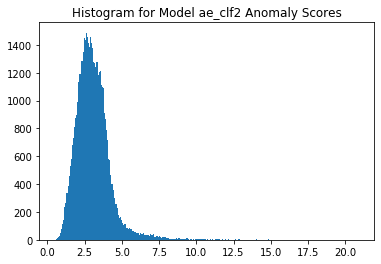

In [19]:
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model ae_clf2 Anomaly Scores")
plt.show()

In [20]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<15, 0, 1)
df_test['cluster'].value_counts()

1    34385
0    14535
Name: cluster, dtype: int64

In [21]:
df_test.groupby('cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,score
cluster,,,,,,,,,,,,
0,0.993686,1.003941,1.000265,0.995398,81566.541658,75778.130719,76872.602546,39.458207,81212.230455,76795.598593,76083.004933,3.083358
1,0.999988,1.002083,1.000083,1.003867,79402.184470,75888.722583,74237.875585,44.114919,79330.830475,74234.150714,75707.881434,17.317740


### Model 3

In [22]:
ae_clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25])
ae_clf3.fit(X_train)
y_test_scores = ae_clf3.decision_function(X_test)
y_test_scores = pd.Series(y_test_scores)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 11)                132       
_________________________________________________________________
dropout_14 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 11)                132       
_________________________________________________________________
dropout_15 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 25)                300       
_________________________________________________________________
dropout_16 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 15)               

102730/102730 [==============================] - 14s 135us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 49/100
102730/102730 [==============================] - 14s 132us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 50/100
102730/102730 [==============================] - 13s 130us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 51/100
102730/102730 [==============================] - 14s 131us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 52/100
102730/102730 [==============================] - 14s 140us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 53/100
102730/102730 [==============================] - 13s 129us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 54/100
102730/102730 [==============================] - 13s 129us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 55/100
102730/102730 [==============================] - 13s 130us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 56/100
102730/102730 [==============================] - 13s 130us/step - loss: 0.9995 - val_loss: 1.0041
Epoch 57/100
1

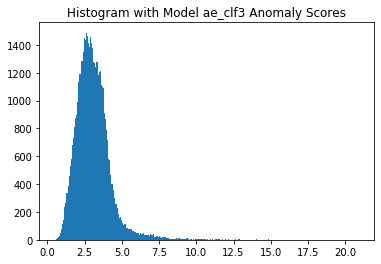

In [24]:
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram with Model ae_clf3 Anomaly Scores")
plt.show()

In [27]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<2, 0, 1)
df_test['cluster'].value_counts()

1    46794
0     2126
Name: cluster, dtype: int64

In [28]:
df_test.groupby('cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,score
cluster,,,,,,,,,,,,
0,0.993926,0.993410,1.010229,0.981602,80747.312794,76684.748354,78792.328316,39.300186,80858.344643,77638.450136,77181.181768,1.620468
1,0.998306,1.003054,0.999679,1.002248,80013.356606,75818.204919,74849.342651,42.887215,79845.824995,74875.111187,75757.464362,3.337373


I would say that the cases in cluster 1 are most likely fraudulent because of the distance score

## Model Stability 

In [33]:
train_scores = pd.DataFrame({'ae_clf1': ae_clf1.decision_scores_,
                             'ae_clf2': ae_clf2.decision_scores_,
                             'ae_clf3': ae_clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'ae_clf1': ae_clf1.decision_function(X_test),
                             'ae_clf2': ae_clf2.decision_function(X_test),
                             'ae_clf3': ae_clf3.decision_function(X_test) 
                            })

In [34]:
train_scores.head()

,ae_clf1,ae_clf2,ae_clf3
0,5.248159,5.248136,5.248147
1,4.607252,4.607275,4.607273
2,2.175196,2.175214,2.175207
3,4.000612,4.000638,4.000627
4,2.104037,2.104038,2.104037


In [35]:
test_scores.head()

,ae_clf1,ae_clf2,ae_clf3
0,4.909885,4.909881,4.909881
1,2.885420,2.885439,2.885438
2,2.659391,2.659416,2.659390
3,2.470937,2.470940,2.470936
4,4.978986,4.978956,4.978976


In [36]:
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

## Average of all scores

In [37]:
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([-0.15760112, -0.34114494, -0.49418003,  1.5424004 , -0.28336601,
        0.53410577,  0.92942375,  0.66877562, -0.21947835])

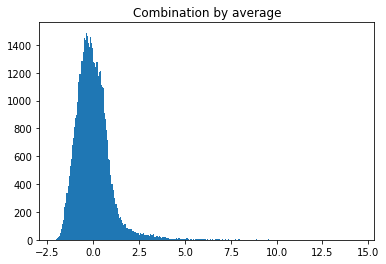

In [38]:
y_by_average = average(test_scores_norm)
plt.hist(y_by_average, bins='auto')
plt.title("Combination by average")
plt.show()

In [39]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    27308
1    21612
Name: y_by_average_cluster, dtype: int64

In [40]:
df_test.groupby('y_by_average_cluster').mean()

,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,Average.Covered.Charges,Average.Medicare.Payments,Average.Total.Payments,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,
0,0.91829,0.919704,1.017397,0.989358,65736.952541,80094.587410,87765.128900,38.402551,70188.591686,85842.189178,80717.618931,-0.622314
1,1.09898,1.107424,0.978328,1.016505,98124.611142,70499.993661,58917.383398,48.200984,92147.895326,61289.413094,69630.077828,0.783725
